In [1]:
# Load packages & dataset
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [3]:
#Basic descriptive exploration
df.info() #'Engine', 'Power', 'Seats', &'New_Price' columns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
#DATA CLEANING

df.describe()

#Drop redundant columns
used_cars = df.drop(['Unnamed: 0','New_Price','Location'], axis=1)

#Dummify categorical columns 
used_cars =pd.get_dummies(data=used_cars, columns=['Fuel_Type', 'Transmission','Owner_Type'])

#transform string data
used_cars['Mileage']= used_cars['Mileage'].str.split(' ',expand=True)[0]
used_cars['Engine']= used_cars['Engine'].str.split(' ',expand=True)[0]
used_cars['Power']= used_cars['Power'].str.split(' ',expand=True)[0]
used_cars['Name'] = used_cars['Name'].str.split(' ',expand=True)[0]
used_cars.head()


#Convert object data to float
used_cars["Mileage"] = pd.to_numeric(used_cars["Mileage"], errors = 'coerce')
used_cars["Engine"] = pd.to_numeric(used_cars["Engine"], errors = 'coerce')
used_cars["Power"] = pd.to_numeric(used_cars["Power"], errors = 'coerce')
used_cars.info()

#Fill missing values
used_cars["Mileage"].fillna(used_cars["Mileage"].astype("float64").mean(), inplace = True)
used_cars["Engine"].fillna(used_cars["Engine"].astype("float64").mean(), inplace = True)
used_cars["Power"].fillna(used_cars["Power"].astype("float64").mean(), inplace = True)
used_cars["Seats"].fillna(used_cars["Seats"].astype("float64").mean(), inplace = True)

#Check for missing values
print(sum(used_cars["Mileage"].isnull()))
print(sum(used_cars["Engine"].isnull()))
print(sum(used_cars["Power"].isnull()))
print(sum(used_cars["Seats"].isnull()))






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       6019 non-null   object 
 1   Year                       6019 non-null   int64  
 2   Kilometers_Driven          6019 non-null   int64  
 3   Mileage                    6017 non-null   float64
 4   Engine                     5983 non-null   float64
 5   Power                      5876 non-null   float64
 6   Seats                      5977 non-null   float64
 7   Price                      6019 non-null   float64
 8   Fuel_Type_CNG              6019 non-null   uint8  
 9   Fuel_Type_Diesel           6019 non-null   uint8  
 10  Fuel_Type_Electric         6019 non-null   uint8  
 11  Fuel_Type_LPG              6019 non-null   uint8  
 12  Fuel_Type_Petrol           6019 non-null   uint8  
 13  Transmission_Automatic     6019 non-null   uint8

Text(0, 0.5, 'Count')

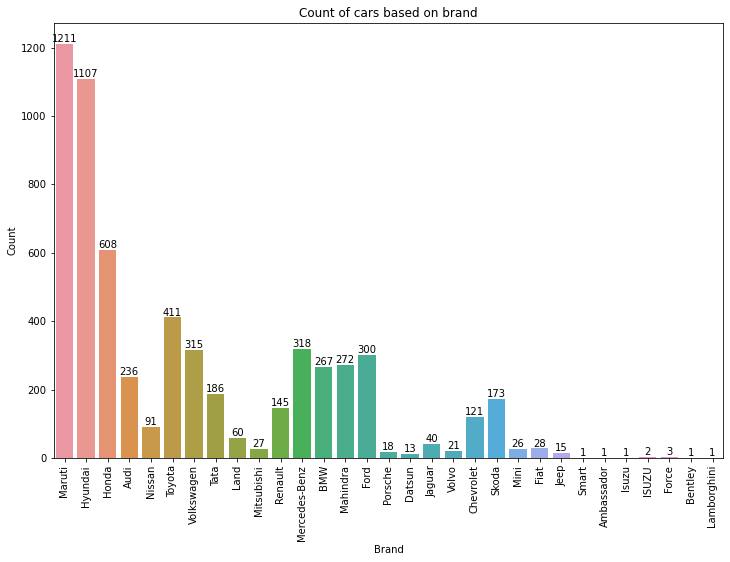

In [6]:
#Visualise car name popularity
Brand = used_cars['Name']
plt.figure(figsize=(12,8))
plot = sns.countplot(x = used_cars['Name'], data = Brand)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on brand")
plt.xlabel("Brand")
plt.ylabel("Count")

In [7]:
#Drop name column 
used_cars = used_cars.drop(['Name'],axis=1)


In [8]:
#Define x&y 
y = used_cars['Price']
x = used_cars.drop(['Price',],axis=1)


#Split the data into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


#Scale the model
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)




In [9]:
#Train & score the Linear Regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.7105089750074863

In [10]:
#Train & Score the RandomForest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
r2_score(y_test, y_pred)


0.8999521622967273